# TP 1 Machine Learning
# KPPV (KNN) 

## Author: 
### $ Koussaila$ $ KADI $ 
### $ kadi.koussaila@outlook.fr $

# Résumé:
la méthode des KNN est une méthode d'apprentissage supervisée, dont le but consiste à estimer la meilleur distance (on classe l'objet en mesurant sa distance avec les objets voisins, puis on le classe dans l'ensemble d'objet le plus proche).

## étpaes:
* 1. récupérer les données (datasets)
* 2. vésulaliser les données pour avoir une idée clair sur le type des données (images, ..)
* 3. vérifications des dimensions (images) et le nombre d'images dans la dataset
* 4. histogramme et estimation de la densité de probabilité pour chaque classe (multiclass classification), dans notre cas, on a 7 classes (7 personnes)
* 5. déviser notre dataset avec 75% pour entrainer notre modèle et 25% pour le test (même cas pour les lables)
* 6. redimensionner les images sous forme des vecteurs pour faciliter le calcul des distance. 
* 6. normalisation de notre training set pour éliminer la composante continue (la moyenne) et rendre la variance unitaire. 
* 7. utiliser le modèle KNN avec 2 types de distances ($ euclidienne $ et $ manhatan $)
* 8. prédire sur notre base de test et construire notre matrice de confusion (pour voir le nombre d'exemples qui sont bien classés et les exemples mal classés)
* 9. test du modèle d'apprentissage avec différente valeur de proches voisins pour trouver la meilleure accuracy (précision sur la base de test) 

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_gallery(images):
#Affiche les 12 premières images contenues dans images
#images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.show()


#load data
[X, y, name]=np.load("TP1.npy",allow_pickle=True)


""" 

les fichiers .npy (des données stockées sous forme de numpy arrays) sont accessible et le chargement et très rapide comparant avec le chargement de données dans un fichier txt ou csv.

pour 10 million de données: 
 - txt file: on prend 9,67 secondes pour le chargement
 - csv file: on prend 2.66 secondes pour le chargement
 - .npy file: on prend 0.13 seconde pour le chargement

 source: 
 https://towardsdatascience.com/ what-is-npy-files-and-why-you-should-use-them-603373c78883

"""

print("ok")

ok


**Explication sur les données:** 

nous allons utiliser une partie de la base de visages “Labeled Faces in the Wild”
provenant de http://vis-www.cs.umass.edu/lfw/. Cette base contient 5749 personnes et 13233
images de taille 62 x 47 pixels. Certaines personnes ne sont représentées qu’une seule fois tandis
que d’autres sont représentées très souvent (plus de 80 fois). Nous utiliserons ici seulement 7
personnes représentées 1288 fois.

In [3]:
#affichage des noms des 7 personnes:
print("les noms des personnes utilisés dans notre base de données sont :\n",pd.DataFrame.from_dict({"noms :":name}))
print("Donc on constate qu'on a un problème de classification avec 7 classes\n")

les noms des personnes utilisés dans notre base de données sont :
               noms :
0       Ariel Sharon
1       Colin Powell
2    Donald Rumsfeld
3      George W Bush
4  Gerhard Schroeder
5        Hugo Chavez
6         Tony Blair
Donc on constate qu'on a un problème de classification avec 7 classes



dimension des features: (1288, 62, 47)
dimension de name: (7,)
dimension de y: (1288,)

commentaire:
On a 1288 images dans notre base de données


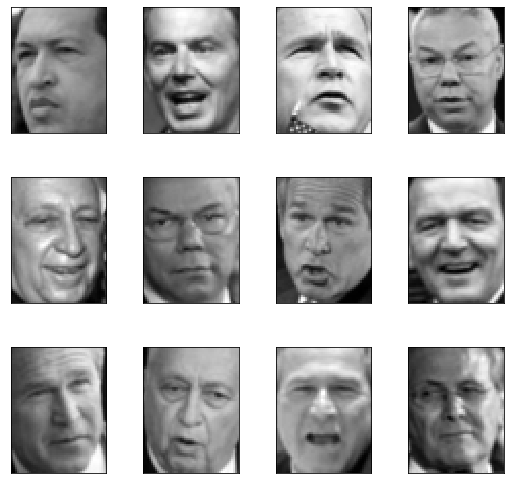

In [4]:
#vérification des dimensions et affichage des images:
print("dimension des features:",np.shape(X))
print("dimension de name:",np.shape(name))
print("dimension de y:",np.shape(y))
print("\ncommentaire:\nOn a 1288 images dans notre base de données")

#display des images
plot_gallery(X[0:12])

histogramme pour notre sortie pour donner une vision de la répartition de mes classes, on constate que
la valeur de y=3 qui correspand à la personne avec un nom George W Bush se répète le plus >500 fois par rapport au autres



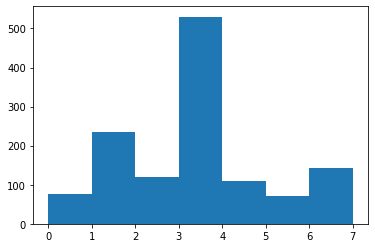

In [5]:
#histogramme
plt.hist(y,bins=7,range=(0,7))
res="histogramme pour notre sortie pour donner une vision de la répartition de mes classes, on constate que\n"
res+="la valeur de y=3 qui correspand à la personne avec un nom {} se répète le plus >500 fois par rapport au autres\n".format(name[3])
print(res)

In [6]:
#diviser ma dataset sur 2 portions, une pour l'apprentissage et l'autre pour le test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

res="on a divisé notre dataset sur 2 partie, la première pour l'apprentissage avec 75%\n"
res+="la deuxième pour les testes avec 25%\n"
res+="test des dimensions\n-------------------\n"
res+="dimension X_train: {}, X_test: {}\n".format(np.shape(X_train),np.shape(X_test))
res+="dimension y_train: {}, y_test: {}\n".format(np.shape(y_train),np.shape(y_test))
print(res)

on a divisé notre dataset sur 2 partie, la première pour l'apprentissage avec 75%
la deuxième pour les testes avec 25%
test des dimensions
-------------------
dimension X_train: (966, 62, 47), X_test: (322, 62, 47)
dimension y_train: (966,), y_test: (322,)



In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],2914)) 
X_test = np.reshape(X_test,(X_test.shape[0],2914)) 
res="reshape - rendre les images sous formes des vecteurs au lieu des matrices\n" 
res+="chaque image est de taille 67X42 => vecteur = 2914\n" 
res+="la nouvelle dimension de X_train: {}:".format(np.shape(X_train))
print(res)

reshape - rendre les images sous formes des vecteurs au lieu des matrices
chaque image est de taille 67X42 => vecteur = 2914
la nouvelle dimension de X_train: (966, 2914):


In [8]:
#utiliser la fonction suivante pour fiter les données et notament pour trouver la matrice de covariance et
#le vecteur des moyennes. pour transfomer les données et les normaliser

scaler = StandardScaler()
scaler.fit(X_train)  #elle défini l'écart type et la moyenne 

#transform
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# on a bien enlever la composante continue
print("mean X_train:",np.mean(X_train))
print("mean X_test:",np.mean(X_test))  
# on a bien eu la variance unitaire:
print("var X_test:",np.var(X_train)) 
print("var X_test:",np.var(X_test))  

print("ok")


mean X_train: 2.6019242e-09
mean X_test: -0.042219147
var X_test: 1.0000002
var X_test: 1.0010839
ok


**Partie classification**

In [9]:
#classifieur: avec la distance euclidienne
#le paramètre p=2: distance euclidienne
classifieur=KNN(n_neighbors=1,p=2) 
classifieur.fit(X_train,y_train)

score=classifieur.score(X_test,y_test)
print("le score de la classification sur la base de test ",score)

le score de la classification sur la base de test  0.577639751552795


**prédiction**

In [10]:
#prédire sur les exempes de testes:
y_pred=classifieur.predict(X_test)
#la matrice de confusion
m=confusion_matrix(y_test,y_pred)
print("la matrice de confusion\n",m)

#calcul du taux de reconnaissance
taux=np.sum(np.diag(m))/(np.sum(m))
print("\n---------------------------\nle taux de reconnaissance: ",taux)
accuracy=accuracy_score(y_test, y_pred)
print("accuracy, vérification: ",accuracy)
print("on a tester le taux de reconnaissance avec 3 méthode et on obtient bien le même\nrésultat")

la matrice de confusion
 [[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]]

---------------------------
le taux de reconnaissance:  0.577639751552795
accuracy, vérification:  0.577639751552795
on a tester le taux de reconnaissance avec 3 méthode et on obtient bien le même
résultat


In [11]:
#on essaye de varier la valeur de K pour déterminer la meilleur classification
histrique_accuracy_eucli=[]
for k in range(1,11):
  classifieur=KNN(n_neighbors=k,p=2) 
  classifieur.fit(X_train,y_train)
  score=classifieur.score(X_test,y_test)
  histrique_accuracy_eucli.append(score)
print("classifieur KNN avec la mesure de la distance euclidiénne\n")

classifieur KNN avec la mesure de la distance euclidiénne



In [80]:
histrique_accuracy_manha=[]
for k in range(1,11):
  classifieur=KNN(n_neighbors=k,p=1) 
  classifieur.fit(X_train,y_train)
  score=classifieur.score(X_test,y_test)
  histrique_accuracy_manha.append(score)
print("classifieur KNN avec la mesure de la distance de manhattan\n")

classifieur KNN avec la mesure de la distance de manhattan




distance euclidienne : la meilleure valeur de K= 6 , accuracy= 0.6428571428571429


distance manhattant  : la meilleure valeur de K= 5 , accuracy= 0.6645962732919255



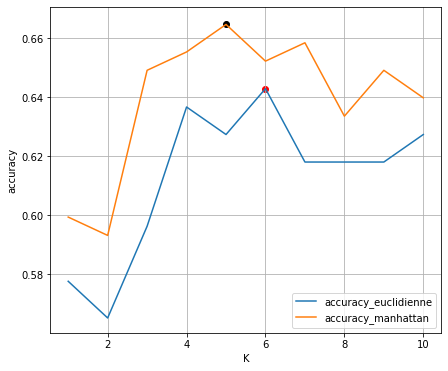

In [81]:
#tracer la précision en fonction de nombre de voisins K 
k=np.arange(1,11,1)

best_accuracy_eucli=max(histrique_accuracy_eucli)
best_K_eucli=histrique_accuracy_eucli.index(best_accuracy_eucli)+1
print("\ndistance euclidienne : la meilleure valeur de K= {} , accuracy= {}\n".format(best_K_eucli,best_accuracy_eucli))


best_accuracy_manha=max(histrique_accuracy_manha)
best_K_manha=histrique_accuracy_manha.index(best_accuracy_manha)+1
print("\ndistance manhattant  : la meilleure valeur de K= {} , accuracy= {}\n".format(best_K_manha,best_accuracy_manha))

plt.figure(figsize=(7,6))
plt.plot(k,histrique_accuracy_eucli,label="accuracy_euclidienne")
plt.scatter(best_K_eucli,best_accuracy_eucli,c="r")
plt.plot(k,histrique_accuracy_manha,label="accuracy_manhattan")
plt.scatter(best_K_manha,best_accuracy_manha,c="black")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

**Conclusion**
coclusion et analyse des deux graphs obtenus, on constate que le classifieur KNN avec la distance de manhattan est plus préci que celui de la distance euclidienne.
la précision de notre algorithme est de 66% sur le classement des 7 classes